In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
def RV(parameters): #function generates RV values plot from given parameters
    K1, K2, P, T = parameters[0], parameters[1], parameters[2], parameters[3]
    e, w, y, t   = parameters[4], parameters[5], parameters[6], parameters[7]
    # t is some value of time, ultimately the independent variable, can bea single value or an array
    M = (2*np.pi/P)*(t) #Mean Anomaly is a function of time
    E1 = M + e*np.sin(M) + ((e**2)*np.sin(2*M)/2) #Eccentric Anomaly is a function of Mean Anomaly
    while True: #iteratively refines estimate of E1 from initial estimate
        E0 = E1
        M0 = E0 - e*np.sin(E0)
        E1 = E0 +(M-M0)/(1-e*np.cos(E0))
        if np.amax(E1-E0) < 1E-9:
            break
    nu = 2*np.arctan(np.sqrt((1 + e)/(1 - e))*np.tan(E1/2)) #True Anomaly is a function of Eccentric anomaly
    RVp, RVs = (K1*(np.cos(nu+w) + (e*np.cos(w)))+y), (K2*(np.cos(nu+w) + (e*np.cos(w)))+y)
    return RVp, RVs

In [12]:
#These parameters are shared by the entire system, DQTau

Period = 1 #period in days determined first via periodogram
T = 0 #Time offset in days, boils down to a horizontal shift in RV. T is the 'zero' point
e = 0.5 #eccentricity (unitless)
w = 0 #longitude of periastron in radians
y = 0 #systemic velocity in km/s
t = np.linspace(0, Period, num = 1000) #provides independent variable values

#these parameters are star specific
K1= 1 #semamplitude in km/s
K2= -1

parameters = K1, K2, Period, T, e, w, y, t

(0, 1)

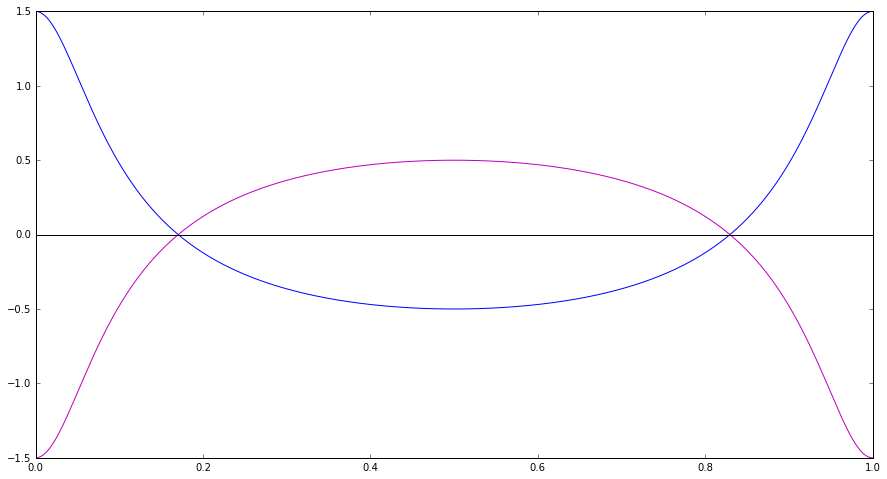

In [13]:
RVp, RVs = RV(parameters)
plt.figure(figsize=(15,8))
plt.plot(t, RVp)
plt.plot(t, RVs, 'm')
plt.plot(t, y*np.ones(t.size), 'k')
plt.xlim(0,P)